### 11.1
给定一组平面上的点:

$$x^\left( 1 \right) = (1,1),x^\left( 2 \right) = (0 ,1),x^\left( 3 \right) = ( -1 ,1),x^\left( 4 \right) = ( 2 ,0 ),x^\left( 5 \right) = ( -1 ,0 )$$

考察平面上的两个中心：

$$c^\left( 1 \right) = (0,0),c^\left( 2 \right) = (1,0)$$

请用k均值算法将 
$$ x^{\left( 1 \right)},x^{\left( 2 \right)},x^{\left( 3 \right)},...,x^{\left( 5 \right)}$$ 

分别归入距离最近的中心，并计算出新中心的位置。



[[0 0]
 [1 0]]


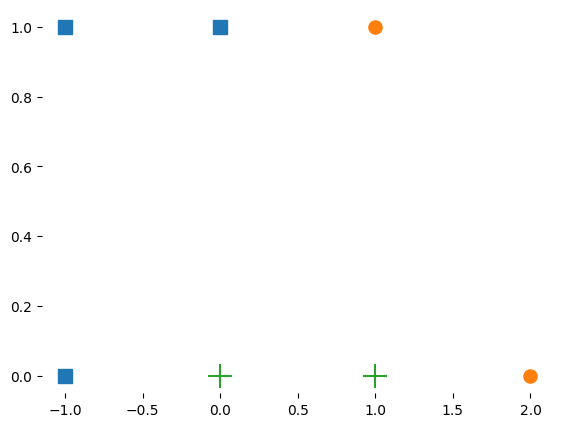

[[ 1.5         0.5       ]
 [-0.66666667  0.66666667]]


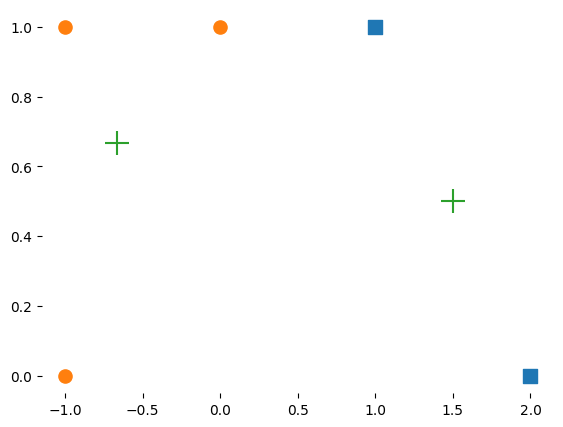

In [4]:
import matplotlib.pyplot as plt
from numpy import *


def distEclud(vecA, vecB):
    """计算向量欧氏距离

    Args:
        vecA: 向量A
        vecB: 向量B
    Returns:
        dist: 欧氏距离
    """
    # 实现使用距离计算公式并返回dist
    dist = sqrt(sum(power(vecA - vecB, 2)))
    # dist = linalg.norm(vecA-vecB)
    return dist


def randCent(dataSet, k):
    """为给定数据集构建一个包含k个随机质心的集合

    Args:
        dataSet: 数据集
        k: 质心个数
    Returns:
        centroids: 质心列表
    """
    n = shape(dataSet)[1]
    centroids = mat(zeros((k, n)))  # 创建存储质心的矩阵，初始化为0
    for j in range(n):  # 随机质心必须再整个数据集的边界之内
        minJ = min(dataSet[:, j])
        rangeJ = float(max(dataSet[:, j]) - minJ)  # 通过找到数据集每一维的最小和最大值
        centroids[:, j] = mat(minJ + rangeJ * random.rand(k, 1))  # 生成0到1之间的随机数，确保质心落在边界之内
    return centroids


def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent, centroids=None, fresh_centroid=False):
    """K-均值算法

    Args:
        dataSet: 数据集
        k: 簇个数
        distMeas: 距离计算函数
        createCent: 创建初始质心函数
    Returns:
        centroids: 质心列表
        clusterAssment: 簇分配结果矩阵
    """
    # 确定数据集中数据点的总数
    m = shape(dataSet)[0]
    # 创建矩阵来存储每个点的簇分配结果,第一列记录簇索引值，第二列存储误差
    clusterAssment = mat(zeros((m, 2)))
    # 创建初始质心
    if centroids is None:
        centroids = createCent(dataSet, k)
    # 标志变量，若为True，则继续迭代
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        # 遍历所有数据找到距离每个点最近的质心
        for i in range(m):
            # 初始化最小距离为inf(无穷大) 索引为负
            min_dist = inf
            min_index = -1
            # 遍历所有质心
            for j in range(k):
                # 针对当前数据点, 计算质心与数据点之间的距离
                # 注意以行为开头 即 行向量 即对每个数据点计算其到每个类中心点的欧氏距离
                distance = distMeas(centroids[j, :], dataSet[i, :])
                if distance < min_dist:
                    # 每次进行判断是否比上次距离更小 进行存储更小的距离
                    # 直至比较到最后取到最小距离 【不保存所有距离，只保存最小距离】
                    min_dist = distance
                    min_index = j
            # 如果索引即 该数据点的归属类（簇）发生了改变 就继续进行循环
            if clusterAssment[i, 0] != min_index:
                clusterChanged = True
            # 将数据点分配到距其最近的簇，并保存距离平方和
            clusterAssment[i, :] = min_index, min_dist ** 2
        # 对每一个簇
        if fresh_centroid:
            for cent in range(k):
                # 得到该簇中所有点的值 (找到 当前类质心 下的所有数据点)
                all_data = dataSet[nonzero(clusterAssment[:, 0].A == cent)[0]]  # .A 将矩阵转化为数组
                # 计算所有点的均值并更新为质心
                centroids[cent, :] = mean(all_data, axis=0)
    return centroids, clusterAssment


def drawDataSet(dataMat, centList, myNewAssments, k):
    """绘图

    Args:
        centList: 质心列表
        myNewAssments: 簇列表
        dataMat: 数据集
        k: 簇个数
    Returns:
        null
    """
    fig = plt.figure()
    rect = [0.1, 0.1, 0.8, 0.8]  # 绘制矩形
    scatterMarkers = ['s', 'o', '^', '8', 'p', 'd', 'v', 'h', '>', '<']  # 构建标记形状的列表用于绘制散点图
    ax1 = fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(k):  # 遍历每个簇
        ptsInCurrCluster = dataMat[nonzero(myNewAssments[:, 0].A == i)[0], :]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]  # 使用索引来选择标记形状
        ax1.scatter(ptsInCurrCluster[:, 0].flatten().A[0], ptsInCurrCluster[:, 1].flatten().A[0], marker=markerStyle,
                    s=90)
    ax1.scatter(centList[:, 0].flatten().A[0], centList[:, 1].flatten().A[0], marker='+', s=300)  # 使用"+"来标记质心
    plt.show()


if __name__ == '__main__':
    dataMat = mat([[1, 1], [0, 1], [-1, 1], [2, 0], [-1, 0]])
    centList, myNewAssments = kMeans(dataMat, 2, centroids=mat([[0, 0], [1, 0]]))
    print(centList)
    drawDataSet(dataMat, centList, myNewAssments, 2)
    centList, myNewAssments = kMeans(dataMat, 2, fresh_centroid=True)
    print(centList)
    drawDataSet(dataMat, centList, myNewAssments, 2)

### 11.2 

考察9条一维数据 $$x^\left( i \right) = i^2,i=1,2,3,...,9$$

用合并聚类算法将这组数据聚成三类.

[[40.5 40.5]
 [ 7.   7. ]
 [24.5 24.5]]


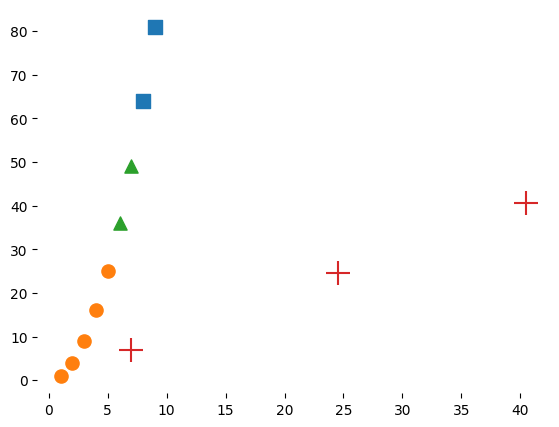

In [5]:
#  Copyright (c) 2022. Generated by Gu.
#  -*- coding=utf-8 -*-
from numpy import *


def loadDataSet():
    """加载数据集

    Args:
        fileName: 文件名
    Returns:
        dataMat:数据列表
    """
    dataMat = []
    for i in range(1, 10):
        dataMat.append([i, i ** 2])
    return dataMat


def distEclud(vecA, vecB):
    """计算向量欧氏距离

    Args:
        vecA: 向量A
        vecB: 向量B
    Returns:
        dist: 欧氏距离
    """
    # 实现使用距离计算公式并返回dist
    dist = sqrt(sum(power(vecA - vecB, 2)))
    # dist = linalg.norm(vecA-vecB)
    return dist


def randCent(dataSet, k):
    """为给定数据集构建一个包含k个随机质心的集合

    Args:
        dataSet: 数据集
        k: 质心个数
    Returns:
        centroids: 质心列表
    """
    n = shape(dataSet)[1]
    centroids = mat(zeros((k, n)))  # 创建存储质心的矩阵，初始化为0
    for j in range(n):  # 随机质心必须再整个数据集的边界之内
        minJ = min(dataSet[:, j])
        rangeJ = float(max(dataSet[:, j]) - minJ)  # 通过找到数据集每一维的最小和最大值
        centroids[:, j] = mat(minJ + rangeJ * random.rand(k, 1))  # 生成0到1之间的随机数，确保质心落在边界之内
    return centroids


def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    """K-均值算法

    Args:
        dataSet: 数据集
        k: 簇个数
        distMeas: 距离计算函数
        createCent: 创建初始质心函数
    Returns:
        centroids: 质心列表
        clusterAssment: 簇分配结果矩阵
    """
    # 确定数据集中数据点的总数
    m = shape(dataSet)[0]
    # 创建矩阵来存储每个点的簇分配结果,第一列记录簇索引值，第二列存储误差
    clusterAssment = mat(zeros((m, 2)))
    # 创建初始质心
    centroids = createCent(dataSet, k)
    # 标志变量，若为True，则继续迭代
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        # 遍历所有数据找到距离每个点最近的质心
        for i in range(m):
            # 初始化最小距离为inf(无穷大) 索引为负
            min_dist = inf
            min_index = -1
            # 遍历所有质心
            for j in range(k):
                # 针对当前数据点, 计算质心与数据点之间的距离
                # 注意以行为开头 即 行向量 即对每个数据点计算其到每个类中心点的欧氏距离
                distance = distMeas(centroids[j, :], dataSet[i, :])
                if distance < min_dist:
                    # 每次进行判断是否比上次距离更小 进行存储更小的距离
                    # 直至比较到最后取到最小距离 【不保存所有距离，只保存最小距离】
                    min_dist = distance
                    min_index = j
            # 如果索引即 该数据点的归属类（簇）发生了改变 就继续进行循环
            if clusterAssment[i, 0] != min_index:
                clusterChanged = True
            # 将数据点分配到距其最近的簇，并保存距离平方和
            clusterAssment[i, :] = min_index, min_dist ** 2
        # 对每一个簇
        for cent in range(k):
            # 得到该簇中所有点的值 (找到 当前类质心 下的所有数据点)
            all_data = dataSet[nonzero(clusterAssment[:, 0].A == cent)[0]]  # .A 将矩阵转化为数组
            # 计算所有点的均值并更新为质心
            centroids[cent, :] = mean(all_data)
    return centroids, clusterAssment


def drawDataSet(dataMat, centList, myNewAssments, k):
    """绘图

    Args:
        centList: 质心列表
        myNewAssments: 簇列表
        dataMat: 数据集
        k: 簇个数
    Returns:
        null
    """
    fig = plt.figure()
    rect = [0.1, 0.1, 0.8, 0.8]  # 绘制矩形
    scatterMarkers = ['s', 'o', '^', '8', 'p', 'd', 'v', 'h', '>', '<']  # 构建标记形状的列表用于绘制散点图
    ax1 = fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(k):  # 遍历每个簇
        ptsInCurrCluster = dataMat[nonzero(myNewAssments[:, 0].A == i)[0], :]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]  # 使用索引来选择标记形状
        ax1.scatter(ptsInCurrCluster[:, 0].flatten().A[0], ptsInCurrCluster[:, 1].flatten().A[0], marker=markerStyle,
                    s=90)
    ax1.scatter(centList[:, 0].flatten().A[0], centList[:, 1].flatten().A[0], marker='+', s=300)  # 使用"+"来标记质心
    plt.show()


if __name__ == '__main__':
    dataMat = mat(loadDataSet())
    centList, myNewAssments = kMeans(dataMat, 3)
    print(centList)
    drawDataSet(dataMat, centList, myNewAssments, 3)


### 11.3

分别用DBSCAN算法和合并聚类算法对例 11.1 中的墨渍数据集进行聚类。

[[ 1  1]
 [ 0  1]
 [-1  1]
 [ 2  0]
 [-1  0]]
cluster Numbers =  0
[0, 0]
finish all in 0.015625


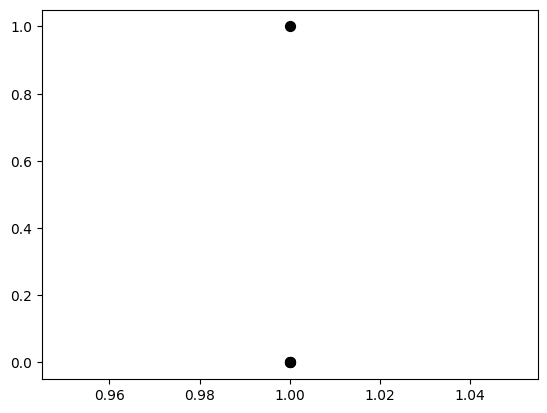

In [22]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import math
import time

UNCLASSIFIED = False
NOISE = 0



def dist(a, b):
    """
    输入：向量A, 向量B
    输出：两个向量的欧式距离
    """
    return math.sqrt(np.power(a - b, 2).sum())


def eps_neighbor(a, b, eps):
    """
    输入：向量A, 向量B
    输出：是否在eps范围内
    """
    return dist(a, b) < eps


def region_query(data, pointId, eps):
    """
    输入：数据集, 查询点id, 半径大小
    输出：在eps范围内的点的id
    """
    nPoints = data.shape[1]
    seeds = []
    for i in range(nPoints):
        if eps_neighbor(data[:, pointId], data[:, i], eps):
            seeds.append(i)
    return seeds


def expand_cluster(data, clusterResult, pointId, clusterId, eps, minPts):
    """
    输入：数据集, 分类结果, 待分类点id, 簇id, 半径大小, 最小点个数
    输出：能否成功分类
    """
    seeds = region_query(data, pointId, eps)
    if len(seeds) < minPts:  # 不满足minPts条件的为噪声点
        clusterResult[pointId] = NOISE
        return False
    else:
        clusterResult[pointId] = clusterId  # 划分到该簇
        for seedId in seeds:
            clusterResult[seedId] = clusterId

        while len(seeds) > 0:  # 持续扩张
            currentPoint = seeds[0]
            queryResults = region_query(data, currentPoint, eps)
            if len(queryResults) >= minPts:
                for i in range(len(queryResults)):
                    resultPoint = queryResults[i]
                    if clusterResult[resultPoint] == UNCLASSIFIED:
                        seeds.append(resultPoint)
                        clusterResult[resultPoint] = clusterId
                    elif clusterResult[resultPoint] == NOISE:
                        clusterResult[resultPoint] = clusterId
            seeds = seeds[1:]
        return True


def dbscan(data, eps, minPts):
    """
    输入：数据集, 半径大小, 最小点个数
    输出：分类簇id
    """
    clusterId = 1
    nPoints = data.shape[1]
    clusterResult = [UNCLASSIFIED] * nPoints
    for pointId in range(nPoints):
        point = data[:, pointId]
        if clusterResult[pointId] == UNCLASSIFIED:
            if expand_cluster(data, clusterResult, pointId, clusterId, eps, minPts):
                clusterId = clusterId + 1
    return clusterResult, clusterId - 1


def plotFeature(data, clusters, clusterNum):
    nPoints = data.shape[1]
    matClusters = np.mat(clusters).transpose()
    fig = plt.figure()
    scatterColors = ['black', 'blue', 'green', 'yellow', 'red', 'purple', 'orange', 'brown']
    ax = fig.add_subplot(111)
    for i in range(clusterNum + 1):
        colorSytle = scatterColors[i % len(scatterColors)]
        subCluster = data[:, np.nonzero(matClusters[:, 0].A == i)]
        ax.scatter(subCluster[0, :].flatten().A[0], subCluster[1, :].flatten().A[0], c=colorSytle, s=50)


def main():
    dataSet = mat([[1, 1], [0, 1], [-1, 1], [2, 0], [-1, 0]])
    print(dataSet)
    clusters, clusterNum = dbscan(dataSet, .5, 2)
    print("cluster Numbers = ", clusterNum)
    print(clusters)
    count = 0  # Modified_用于将结果输出到文件
    plotFeature(dataSet, clusters, clusterNum)


if __name__ == '__main__':
    start = time.process_time()  # Modified_将time.clock()替换为time.process_time()
    main()
    end = time.process_time()  # Modified_将time.clock()替换为time.process_time()
    print('finish all in %s' % str(end - start))
    plt.show()


### 11.4 

请用合并聚类算法,对例11.3中的同心圆数据集进行聚类。

### 11.5

分别用k均值算法、合并聚类算法与DBSCAN算法对鸢尾花数据集进行聚类，
并检验聚类的结果是否与数据的标签一致。

### 11.6   小批量k均值算法。

    k均值算法的计算时间复杂度为O(mnkN)。其中，m是训练数据的个数。由此可见，
    当m较大时，k均值算法需要较长的运行时间。因此，许多实际问题都采用k均值算法的一
    个变形一小批量 k均值算法。


    小批量k均值算法分N轮循环进行。在每一轮循环中，都进行样本归类和中心调整两
    步。在循环开始前,随机选取k个中心。在每一轮 循环中，算法读取b条训练数据采样。其
    中，b是算法参数，由算法设计者指定。在样本归类这一一步中，将这b条数据中的每一条数据
    归人距其最近的中心。在中心调整这一步中 ,将每个中心调整为两部分点的平均值，第一部
    分是当前b条数据中归人该中心的点，第二部分是所有在以往的循环中被归人该中心的点，
    在N轮循环之后算法返回得到的k个中心。

(1)分析小批量k均值算法的时间复杂度。

(2)实现小批量k均值算法。

(3)分别用k均值算法和小批量k均值算法对手写数字识别数据集进行聚类，检验聚类的结果是否与数据的标签一致，并比较两个算法的运行时间。

### 11.7  均值漂移算法


均值漂移算法是一个基于划分的聚类算法。
给定一组数据，均值漂移算法通过迭代来调整每个数据点的位置，使得每一点都朝着该点领域内密度较高的区域漂移，以完成聚类，图 11.21 是均值漂移算法的聚类过程演示。在图 11.21 中，通过将每个点朝密度较高的区域漂移，所有的点逐渐聚成了3类。
    
以下是均值漂移算法的具体描述。
    
给定m条数据
 $$x^{\left( 1 \right)},x^{\left( 2 \right)},x^{\left( 3 \right)},...,x^{\left( m \right)}\in R^n$$
    
算法分N轮循环进行。在每一轮的循环当中，算法首先为每一点$x^{\left( i \right)}$,计算它的$\varepsilon$领域


$$N_{i} = \{j:||x^{\left( j \right)} - x^{\left( i \right)}|| \leqslant \varepsilon,1 \leqslant j \leqslant m  \} , 1\leqslant i \leqslant m $$

其中,$\varepsilon$ 是一个算法参数，由算法设计者指定。然后，对每个 $1\leqslant i \leqslant m$,计算

$$ z^{\left( i \right)} = \frac{\sum\limits_{j \in N_i} K (x^{\left( i \right)},x^{\left( j \right)})\bullet x^{\left( j \right)}}{\sum\limits_{j \in N_i} K (x^{\left( i \right)},x^{\left( j \right)})} $$

其中，K($\bullet$,$\bullet$)是一个核函数，一般取为高斯核函数


$$K(x,z) = e ^ {- \frac{||x-z||^2}{2\sigma^2}} ,  
x,z \in R ^n$$
  
函数中的 $\sigma$ 是一个算法参数。最后，对每一个 $1\leqslant i \leqslant m$,调整$x^{\left( i \right)}$的位置至$z^{\left( i \right)}$,即 $x^{\left( i \right)} \gets z^{\left( i \right)} $


(1)实现上述均值漂移算法。


(2) 以下 11.22 中的程序用于生成图 11.21（a）中的数据采样，请基于 11.22 中的程序，采用（1）中实现的均值漂移算法，
调试合适的算法参数 $\sigma$ 和 $\varepsilon$ ,完成数据聚类。


![11.21](11.21_ab.png)

&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;（a）  &#8195; &#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;  &#8195;&#8195;&#8195;&#8195;&#8195;（b）

![11.21](11.21_cd.png)

&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;（c）  &#8195; &#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;  &#8195;&#8195;&#8195;&#8195;&#8195;（d）

![11.21](11.21_ef.png)

&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;（e）  &#8195; &#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;&#8195;  &#8195;&#8195;&#8195;&#8195;&#8195;（f）


    图11.21 均值漂移过程

In [3]:
#图11.22  生成图11.21(a)中的数据采样
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=0.4)
